키워드 분석
============

In [3]:
#conda install matplotlib

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# for old-ver jupyter
%matplotlib inline
# 시각화 결과가 선명하게 표시
%config InlineBackend.figure_format = 'retina'

In [9]:
#case of windows
#family="Malgun Gothic"

#Mac
plt.rc("font", family="AppleGothic")
plt.rc('axes', unicode_minus=False)

In [69]:
df = pd.read_csv("inflearn-event.csv")
df.shape

(2447, 1)

In [70]:
df.head()

,text
0,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
1,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
2,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!
3,"2020년 목표 : 리액트 공부하기, 스프링 공부하기"
4,2020년에는 아이티 마스터가 되기 관심강의 리액트\n#관심강의 : React로 N...


In [71]:
#remove dup_text such as network error
print(df.shape)
df = df.drop_duplicates(["text"], keep="last")
print(df.shape)

(2447, 1)
(2410, 1)


In [72]:
#before pre-process, keep origin-ver
df["origin_text"] = df["text"]

In [73]:
df.head()

,text,origin_text
0,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
1,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
2,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!
3,"2020년 목표 : 리액트 공부하기, 스프링 공부하기","2020년 목표 : 리액트 공부하기, 스프링 공부하기"
4,2020년에는 아이티 마스터가 되기 관심강의 리액트\n#관심강의 : React로 N...,2020년에는 아이티 마스터가 되기 관심강의 리액트\n#관심강의 : React로 N...


In [74]:
#convert to Lower case
df["text"] = df["text"].str.lower()

In [75]:
#convert same meaning
df["text"] = df["text"].str.replace(
    "python","파이썬").str.replace(
    "pandas","판다스").str.replace(
    "javascript","자바스크립트").str.replace(
    "java","자바").str.replace(
    "react","리액트").str.replace(
    "공공 데이터","공공데이터")

In [76]:
df["course"] = df["text"].apply(lambda x: x.split("관심강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심강좌")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":","")
df["course"].tail()

2442                                  스프링 데이터 jpa
2443                                스프링 부트 개념과 활용
2444            에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2445      파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2446                                  남박사의 파이썬 활용
Name: course, dtype: object

In [77]:
df[["text","course"]].tail()

,text,course
2442,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...",스프링 데이터 jpa
2443,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용
2444,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌
2445,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
2446,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...,남박사의 파이썬 활용


In [78]:
#Core
search_keyword = ['머신러닝','딥러닝','파이썬','공공데이터']
for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)

In [86]:
#or
df_python = df[df["text"].str.contains("파이썬|공공데이터")].copy() 
df_python.shape

(430, 7)

In [79]:
df[search_keyword].sum().sort_values(ascending=False)

파이썬      406
머신러닝     132
딥러닝       52
공공데이터     13
dtype: int64

In [84]:
text = df.loc[(df["공공데이터"]==True), "text"]

for _text in text:
    print("-"*20)
    print(_text)
    
#df.loc[df["공공데이터"]==True]

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 새롭게 딥러닝에 대한 공부를 시작하고자 합니다!
#관심분야 : 밑바닥부터 시작하는 머신러닝 입문,  공공데이터 분석
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 박조은 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이팅!!!
#관심강의 : 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... 올해는 꼭 완강하고 실습해서 개발

빈도수계산
==============

In [92]:
#conda install scikit-learn

In [93]:
"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', #캐릭터 단위로 벡터화
                            tokenizer = None, #토크나이저 따로 지정
                            preprocessor = None, #전처리 도구
                            stop_words = None, #불용어처리
                            min_df = 2, #토큰이 나타날 최소 문서 개수, 오타나 자주나오지 않는 특수한 전문용어 처리
                            ngram_range=(3,6), #bow의 단어 갯수 3~6개만 추출
                            max_features = 2000 #만들 피처의 수, 단어의 수
                            )

In [97]:
feature_vector = vectorizer.fit_transform(df["course"])
feature_vector.shape

(2410, 2000)

In [98]:
#같은 강좌여도 3~6개로 중복되어 묶도록
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [99]:
#각 리뷰마다 등장하는 단어에 빈도수가 표현, 0이면 등장하지 않음
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
#위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있음
#벡터화된 피처
#Bag of words에 몇개의 단어가 들어있는지
dist = np.sum(feature_vector, axis=0)

df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,2,2,2,2,2,2,2,2,2,2,...,16,13,13,12,2,8,8,2,2,2


In [102]:
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,60
리액트로 nodebird sns,49
리액트로 nodebird sns 만들기,49
...,...
하는 리액트 초심자를 위한 리액트,20
리액트 초심자를 위한,20
초심자를 위한 리액트 핵심,20
위한 리액트 핵심,20


TF-IDF
==========
TfidfTransformer()
- norm='L2' 각 문서의 피처 벡터를 어떻게 정휴화 할지
>L2 : 벡터의 각 원소 제곱의 합이 1이 되도록 (유클리디안)
>L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 (맨하탄거리)
- smooth_idf = False
>피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지 결정
- sublinear_tf=False
- use_idf=True
>TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지

In [103]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [104]:
%%time
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

CPU times: user 2.88 ms, sys: 1.63 ms, total: 4.51 ms
Wall time: 5.52 ms


(2410, 2000)

In [105]:
feature_tfidf

<2410x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11553 stored elements in Compressed Sparse Row format>

In [107]:
#각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 tf-idf가중치 반영
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(20)

,0
홍정모의 따라하며 배우는,67.919790
스프링 데이터 jpa,35.679490
nodebird sns 만들기,26.975282
파이썬 머신러닝 완벽,24.843294
머신러닝 완벽 가이드,24.595570
리액트로 nodebird sns 만들기,24.349226
리액트로 nodebird sns,24.349226
파이썬 머신러닝 완벽 가이드,23.943718
함수형 프로그래밍과 자바스크립트 es6,19.132171
함수형 프로그래밍과 자바스크립트,19.132171


In [109]:
for t in df_tfidf_top.index[:50]:
    print(t)

홍정모의 따라하며 배우는
스프링 데이터 jpa
nodebird sns 만들기
파이썬 머신러닝 완벽
머신러닝 완벽 가이드
리액트로 nodebird sns 만들기
리액트로 nodebird sns
파이썬 머신러닝 완벽 가이드
함수형 프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
프로그래밍과 자바스크립트 es6
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
2020년 공부 목표
실전 스프링 데이터
실전 스프링 데이터 jpa
실전 100 활용
파이썬 실전 100 활용
파이썬 실전 100
남박사의 파이썬 실전 100 활용
남박사의 파이썬 실전 100
남박사의 파이썬 실전
관심있는 인프런 강의명
파이썬 머신러닝 완벽가이드
따라하며 배우는 c언어
홍정모의 따라하며 배우는 c언어
rest api 개발
대세는 쿠버네티스 기초편
orm 표준 jpa
표준 jpa 프로그래밍
orm 표준 jpa 프로그래밍
스프링부트 개념과 활용
자바 orm 표준 jpa
자바 orm 표준
자바 orm 표준 jpa 프로그래밍
vue js 완벽 가이드
vue js 완벽
js 완벽 가이드
기반 rest api
스프링 기반 rest
스프링 기반 rest api
스프링 기반 rest api 개발
기반 rest api 개발
애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는
자바 애플리케이션을 테스트하는 다양한
파이썬 알고리즘 문제풀이
애플리케이션을 테스트하는 다양한 방법
테스트하는 다양한 방법


군집화
====================

In [112]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start= 10
end = 50

#적절한 클러스터 갯수를 알기위해 inertia를 구함
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state =42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:25<00:00,  1.57it/s]


Text(0.5, 1.0, 'K-means 클러스터 비교')

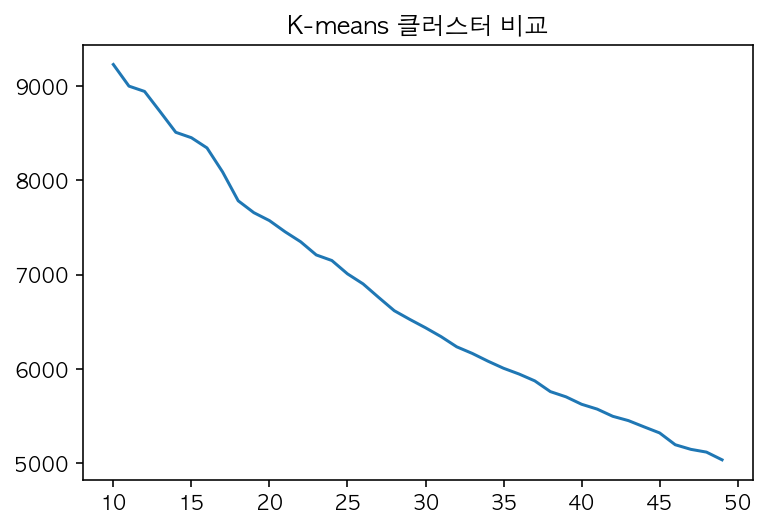

In [113]:
plt.plot(range(start,end),inertia)
plt.title("K-means 클러스터 비교")

In [115]:
n_clusters = 30
cls = KMeans(n_clusters=n_clusters, random_state =42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict

In [116]:
df["cluster"].value_counts().head(10)

0     1927
24      47
22      45
3       40
18      33
11      30
9       30
4       29
26      24
7       21
Name: cluster, dtype: int64

In [121]:
#batch-size를 쓸 수 있는 MiniBatchKMeans 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state= 42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:03<00:00, 12.85it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

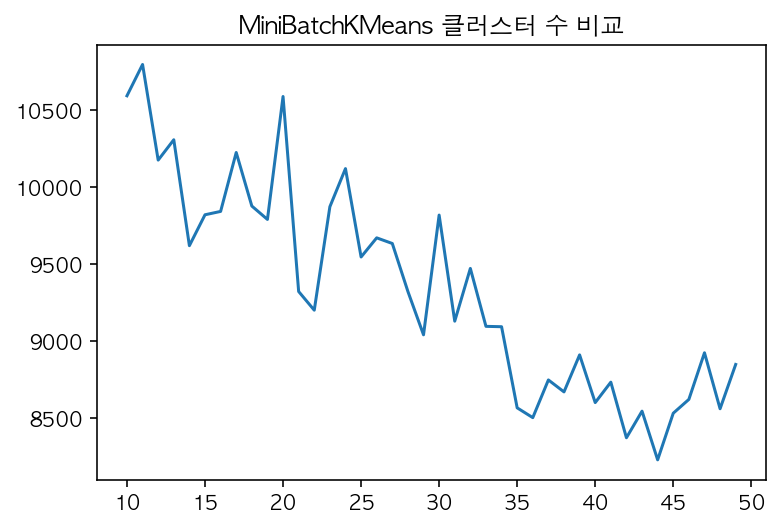

In [123]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [125]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state =42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"]=predict

In [126]:
df["bcluster"].value_counts()

19    1328
0      532
14      89
13      48
16      47
10      46
15      46
29      32
22      31
6       30
25      24
4       24
23      23
7       18
3       17
8       15
28      13
17      12
5       10
9        8
21       5
18       3
12       3
2        2
11       2
1        2
Name: bcluster, dtype: int64

In [136]:
df.loc[df["bcluster"]== 10,["bcluster","cluster","course"]]

,bcluster,cluster,course
42,10,0,"모두를 위한 딥러닝 - deep reinforcement learning, 그 외..."
56,10,0,"모두를 위한 딥러닝 - deep reinforcement learning, 그 외..."
77,10,0,백엔드 개발자인데 프론트엔드에도 관심이 많아요\n#스프링부트 #vue.js #jpa
81,10,0,"매니저님 야근 하시나...ㅠㅠ\n전자정부프레임워크, jsp, mybatis로 개발중..."
140,10,14,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
228,10,14,\n파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
236,10,14,개발하는 마케터가 되겠습니다아악!!\n#파이썬 입문 및 웹 크롤링을 활용한 다양한 ...
272,10,14,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기
332,10,0,모두를 위한 딥러닝 - 기본적인 머신러닝과 딥러닝 강좌
347,10,14,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기


Word Cloud
======

In [138]:
#conda install -c conda-forge wordcloud

In [160]:
from wordcloud import WordCloud
#불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트

stopwords = ["관심 강의","관심강의","관심","강의","강좌","강의를","올해","올해는","열심히","공부를","합니다","하고","싶어요","2020년"]

def displayWordCloud(data = None,backgroundcolor = 'white',width=1280, height=768):
    wordcloud = WordCloud(
                    font_path = '/Library/Fonts/AppleGothic.ttf',
                    stopwords = stopwords,
                    background_color = backgroundcolor,
                    width = width, height = height).generate(data)
    plt.figure(figsize = (15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

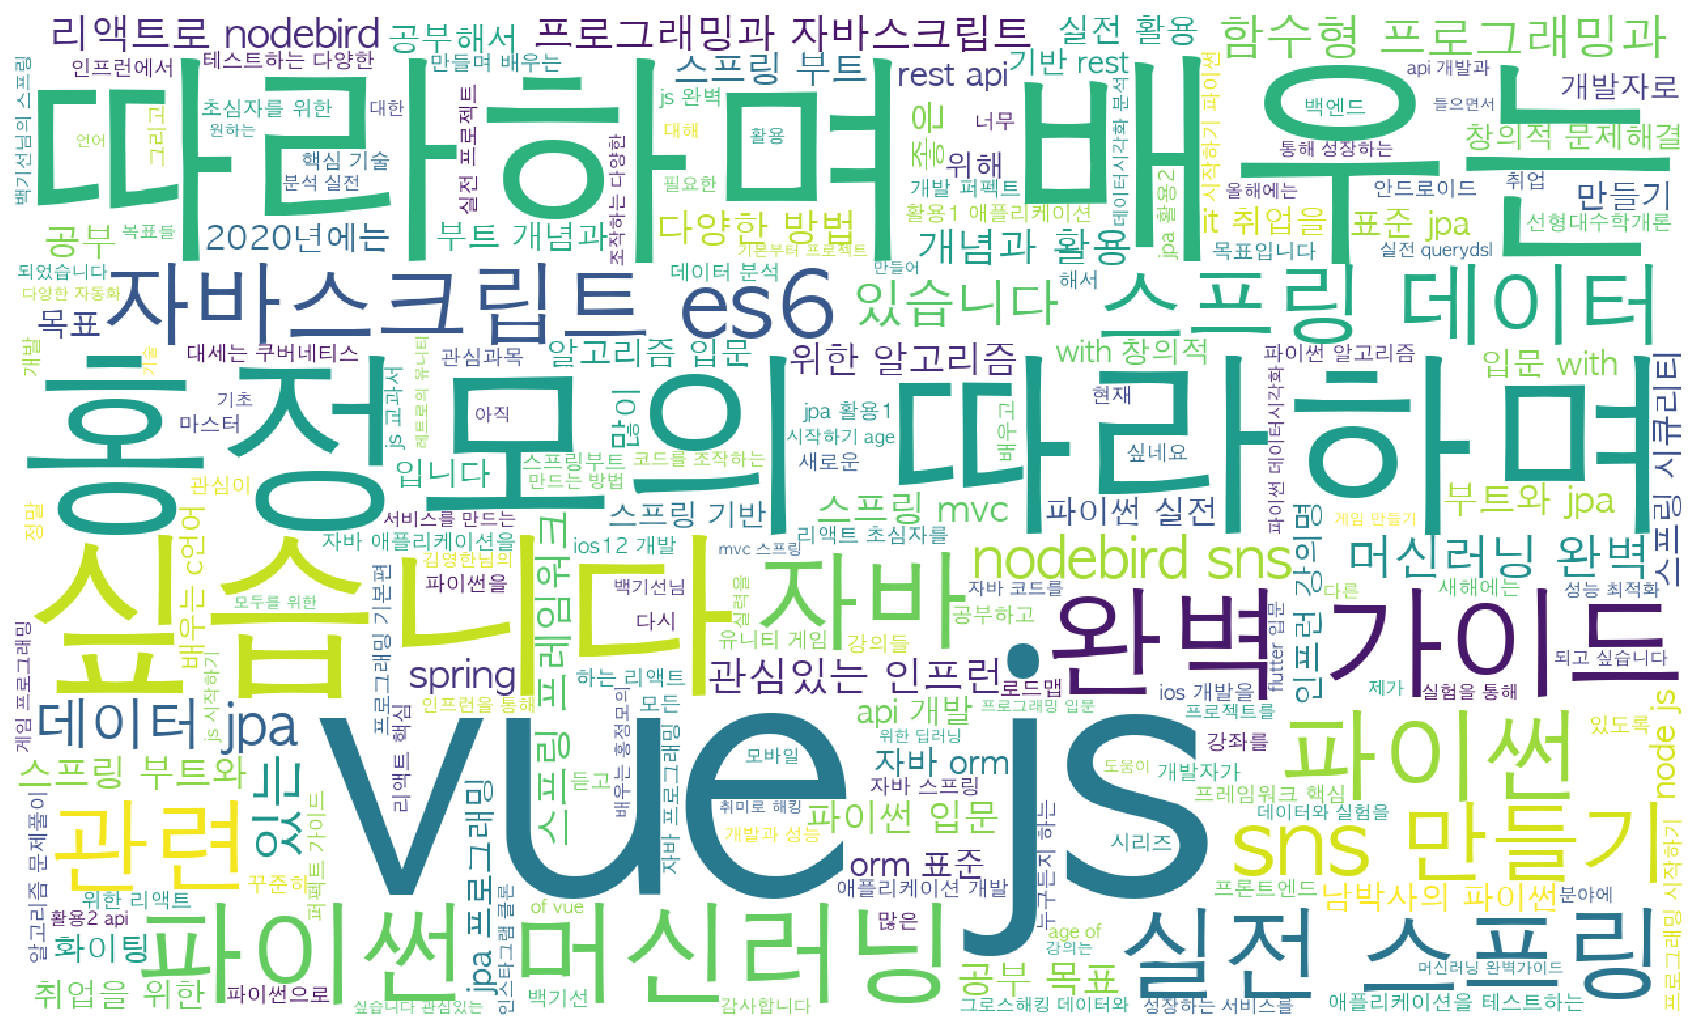

In [161]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)